# Automobile Insurance Fraud


Problem Statement:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# _c39 is a null colummn. Hence dropping _c39

df=df.drop(['_c39'],axis=1)

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [10]:
# replacing ? from dataframe to np.nan

df=df.replace({'?':np.nan})

In [11]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
# treating nan values using fillna


In [13]:
df['property_damage']=df['property_damage'].fillna(method='ffill')

In [14]:
df['collision_type']=df['collision_type'].fillna(method='ffill')

In [15]:
df['police_report_available']=df['police_report_available'].fillna(method='ffill')

In [16]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [17]:
# The umbrella limit cannot be in negative..

df['umbrella_limit'] =df['umbrella_limit'] .replace(to_replace=-1000000,value=1000000)

In [18]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000,  1000000,  2000000], dtype=int64)

In [19]:
#Extracting date time from policy_bind_date.


df['policy_bind_date']=df.policy_bind_date.str.replace('-','/')

In [20]:
df['policy_bind_date']

0      17/10/2014
1      27/06/2006
2      06/09/2000
3      25/05/1990
4      06/06/2014
          ...    
995    16/07/1991
996    05/01/2014
997    17/02/2003
998    18/11/2011
999    11/11/1996
Name: policy_bind_date, Length: 1000, dtype: object

In [21]:
df['policy_bind_Date']=pd.to_datetime(df.policy_bind_date, format='%d/%m/%Y').dt.day

In [22]:
df['policy_bind_Month']=pd.to_datetime(df.policy_bind_date, format='%d/%m/%Y').dt.month

In [23]:
df['policy_bind_Year']=pd.to_datetime(df.policy_bind_date, format='%d/%m/%Y').dt.year

In [24]:
# dropping policy_bind_date

df.drop(columns=['policy_bind_date'],inplace=True)

In [25]:
#Extracting date time from incident_date.


df['incident_date']=df.incident_date.str.replace('-','/')

In [26]:
df['incident_Date']=pd.to_datetime(df.incident_date, format='%d/%m/%Y').dt.day

df['incident_Month']=pd.to_datetime(df.incident_date, format='%d/%m/%Y').dt.month

df['incident_Year']=pd.to_datetime(df.incident_date, format='%d/%m/%Y').dt.year

In [27]:
# dropping incident_date

df.drop(columns=['incident_date'],inplace=True)

In [28]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Side Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,YES,0,0,YES,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Front Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,YES,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,YES,108480,18080,18080,72320,Volkswagen,Passat,2015,N,5,1,2014,24,1,2015
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,YES,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,YES,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,2015


In [29]:
df.dtypes == 'object' 

months_as_customer             False
age                            False
policy_number                  False
policy_state                    True
policy_csl                      True
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                     True
insured_education_level         True
insured_occupation              True
insured_hobbies                 True
insured_relationship            True
capital-gains                  False
capital-loss                   False
incident_type                   True
collision_type                  True
incident_severity               True
authorities_contacted           True
incident_state                  True
incident_city                   True
incident_location               True
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
w

### Univariate Analysis...

In [30]:
# making dataframe fr ordinal data..

ord=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type' ,'collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','fraud_reported']

In [31]:
list(enumerate(ord))

[(0, 'policy_state'),
 (1, 'policy_csl'),
 (2, 'insured_sex'),
 (3, 'insured_education_level'),
 (4, 'insured_occupation'),
 (5, 'insured_hobbies'),
 (6, 'insured_relationship'),
 (7, 'incident_type'),
 (8, 'collision_type'),
 (9, 'incident_severity'),
 (10, 'authorities_contacted'),
 (11, 'incident_state'),
 (12, 'incident_city'),
 (13, 'property_damage'),
 (14, 'police_report_available'),
 (15, 'auto_make'),
 (16, 'fraud_reported')]

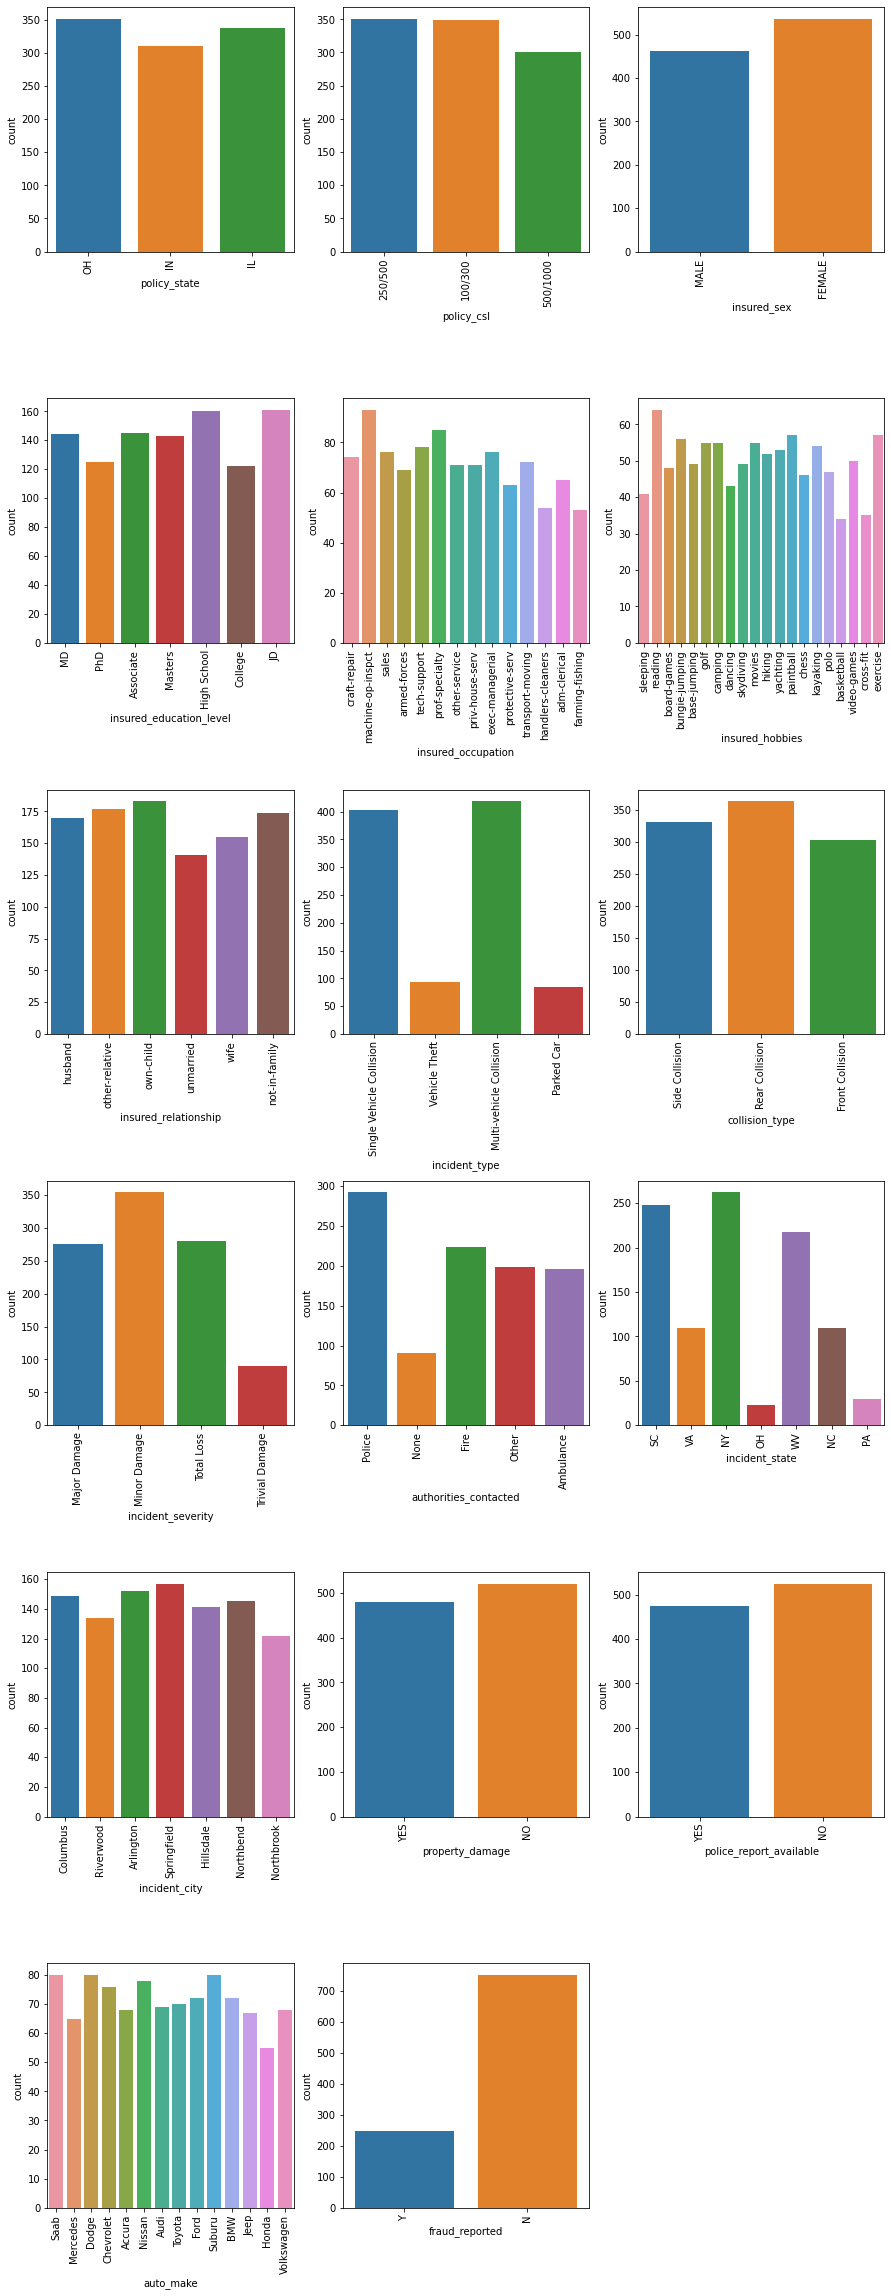

In [32]:
plt.figure(figsize=(15,18))
for i in enumerate(ord):
    plt.subplot(7,3,i[0]+1)
    plt.subplots_adjust(left=0.125,
                    bottom=5, 
                    right=0.9, 
                    top=7, 
                    wspace=0.2, 
                    hspace=0.60)
    sns.countplot( i[1], data=df)
    plt.xticks(rotation=90)

- CH is comparitivly higher than IN and IL
- 250/500 and 100/300 is widly chosen.
- Mostly all the insuree's are above bachelors..
- Females get more insurance.
- Insured occupation is machine inspect, prof,managers, tech support.
- Most parents have got Insurance for there child.
- Multi Vehicle Collision is the main reason for Insurance.
- Rear collision being the fist reason.
- majorly the Mirror damage is there.
- Poice is being contacted after incident.
- New York state have more accidents.


### Bivariate Analysis..

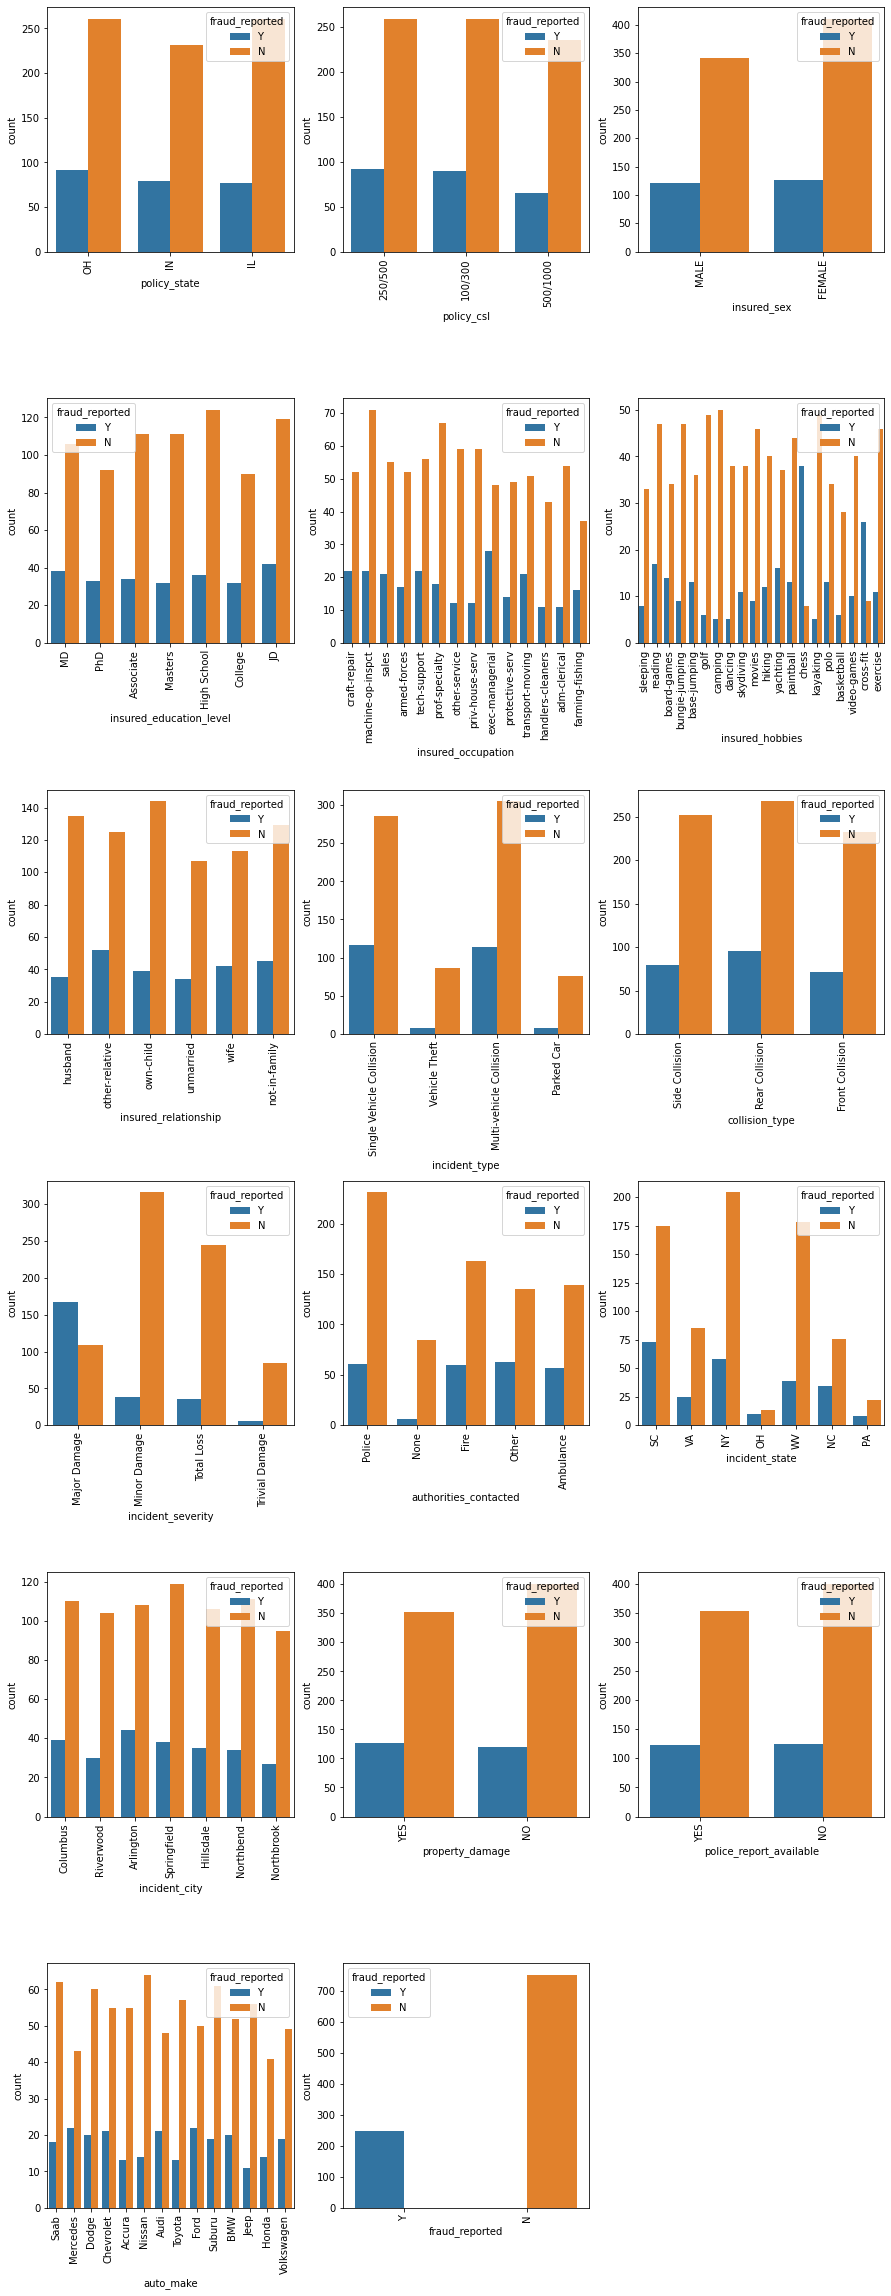

In [33]:
plt.figure(figsize=(15,18))
for i in enumerate(ord):
    plt.subplot(7,3,i[0]+1)
    plt.subplots_adjust(left=0.125,
                    bottom=5, 
                    right=0.9, 
                    top=7, 
                    wspace=0.2, 
                    hspace=0.60)
    sns.countplot( i[1], hue='fraud_reported',data=df)
    plt.xticks(rotation=90)

In [34]:
print(df['policy_bind_Year'].value_counts())
print(df['policy_bind_Month'].value_counts())

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
1994    41
2006    41
2001    41
2007    40
2005    40
1999    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
1993    33
2008    33
2011    32
2000    31
1998    30
2015     3
Name: policy_bind_Year, dtype: int64
12    95
8     93
7     91
2     90
11    85
4     83
1     83
6     80
3     79
10    78
9     74
5     69
Name: policy_bind_Month, dtype: int64


Most policies were from 1991
Third quater of the year brings more sales..

In [35]:
df[df['fraud_reported']== 'Y']['age'].value_counts()

41    16
31    14
34    13
33    12
43    11
32    11
38    11
29    10
37    10
39    10
42     9
44     8
26     8
47     7
46     7
28     7
48     6
30     6
45     5
35     5
36     4
60     4
58     4
57     4
51     4
40     4
23     4
25     4
55     4
56     3
50     3
54     3
61     3
27     3
24     2
52     2
22     1
63     1
62     1
53     1
59     1
19     1
Name: age, dtype: int64

Mostly the frauds are done by people above age 30

In [36]:
df[df['fraud_reported']== 'Y']['insured_occupation'].value_counts()

exec-managerial      28
craft-repair         22
tech-support         22
machine-op-inspct    22
sales                21
transport-moving     21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
priv-house-serv      12
other-service        12
handlers-cleaners    11
adm-clerical         11
Name: insured_occupation, dtype: int64

### MultiVariate Analysis

In [37]:
# There are categorical values in the dataset, hence using OrdinalEncoder


from sklearn.preprocessing import OrdinalEncoder

In [38]:
enc=OrdinalEncoder()

In [39]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [40]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,996.0,5,1,1.0,1,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,17,10,2014,25,1,2015
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,2.0,1.0,4.0,5.0,5.0,628.0,8,1,1.0,0,0,1.0,5070,780,780,3510,8.0,12.0,2007,1.0,27,6,2006,21,1,2015
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,685.0,7,3,0.0,2,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,6,9,2000,22,2,2015
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,669.0,5,1,0.0,1,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,25,5,1990,10,1,2015
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,0.0,1.0,2.0,1.0,0.0,220.0,20,1,0.0,0,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0,6,6,2014,17,2,2015


In [41]:
# checking correlation

df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year,incident_Date,incident_Month,incident_Year
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.016111,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.054097,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.070639,0.014736,-0.002574,-0.010162,0.058383,-0.045847,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,0.054809,-0.001559,-0.048276,-0.001455,-0.042826,NaN
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018425,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.059131,-0.058439,0.015417,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.006374,-0.015679,0.052359,-0.042590,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.056776,0.008357,-0.037444,0.003697,-0.037058,NaN
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008903,0.007083,0.004564,-0.037264,-0.014422,0.039896,0.017120,0.009802,-0.005669,0.001742,-0.002603,-0.015719,0.018565,-0.010064,-0.035406,0.016393,0.000113,0.013432,-0.028287,-0.004558,-0.012661,0.010310,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,0.045574,-0.003439,-0.040099,0.054788,-0.032472,NaN
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.028558,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.040197,-0.026377,-0.016777,0.008723,-0.002077,0.029534,0.029457,-0.042263,-0.047495,0.013384,0.022960,0.075587,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,0.011178,0.046871,-0.007276,0.025572,0.018531,NaN
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.020614,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.017744,0.022530,0.056182,0.032814,0.009333,0.047704,-0.001869,-0.019403,-0.021232,-0.000595,0.071500,-0.014257,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,0.010164,-0.021547,-0.016466,-0.007640,-0.030164,NaN
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.009968,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.040639,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.060935,0.051214,-0.003745,-0.022765,0.066639,0.045515,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.000265,-0.025020,-0.049598,-0.022701,-0.026416,NaN
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.005956,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036168,-0.011155,-0.055191,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.007861,0.026780,0.002332,0.021950,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.037933,-0.002480,0.001249,0.028797,-0.046097,NaN
umbrella_limit,0.016111,0.018425,0.008903,-0.028558,0.020614,0.009968,-0.005956,1.000000,0.018913,0.011630,-0.020692,0.023290,-0.036820,0.078868,-0.048074,-0.023235,0.016640,0.022476,0.008372,0.027824,-0.078836,0.011834,0.014014,-0.023097,-0.021997,-0.038667,0.021698,-0.007123,-0.021746,-0.038994,-0.045229,-0.022044,-0.037190,-0.005211,0.040717,0.008578,0.058147,-0.024504,-0.046279,0.047246,-0.008570,-0.0034

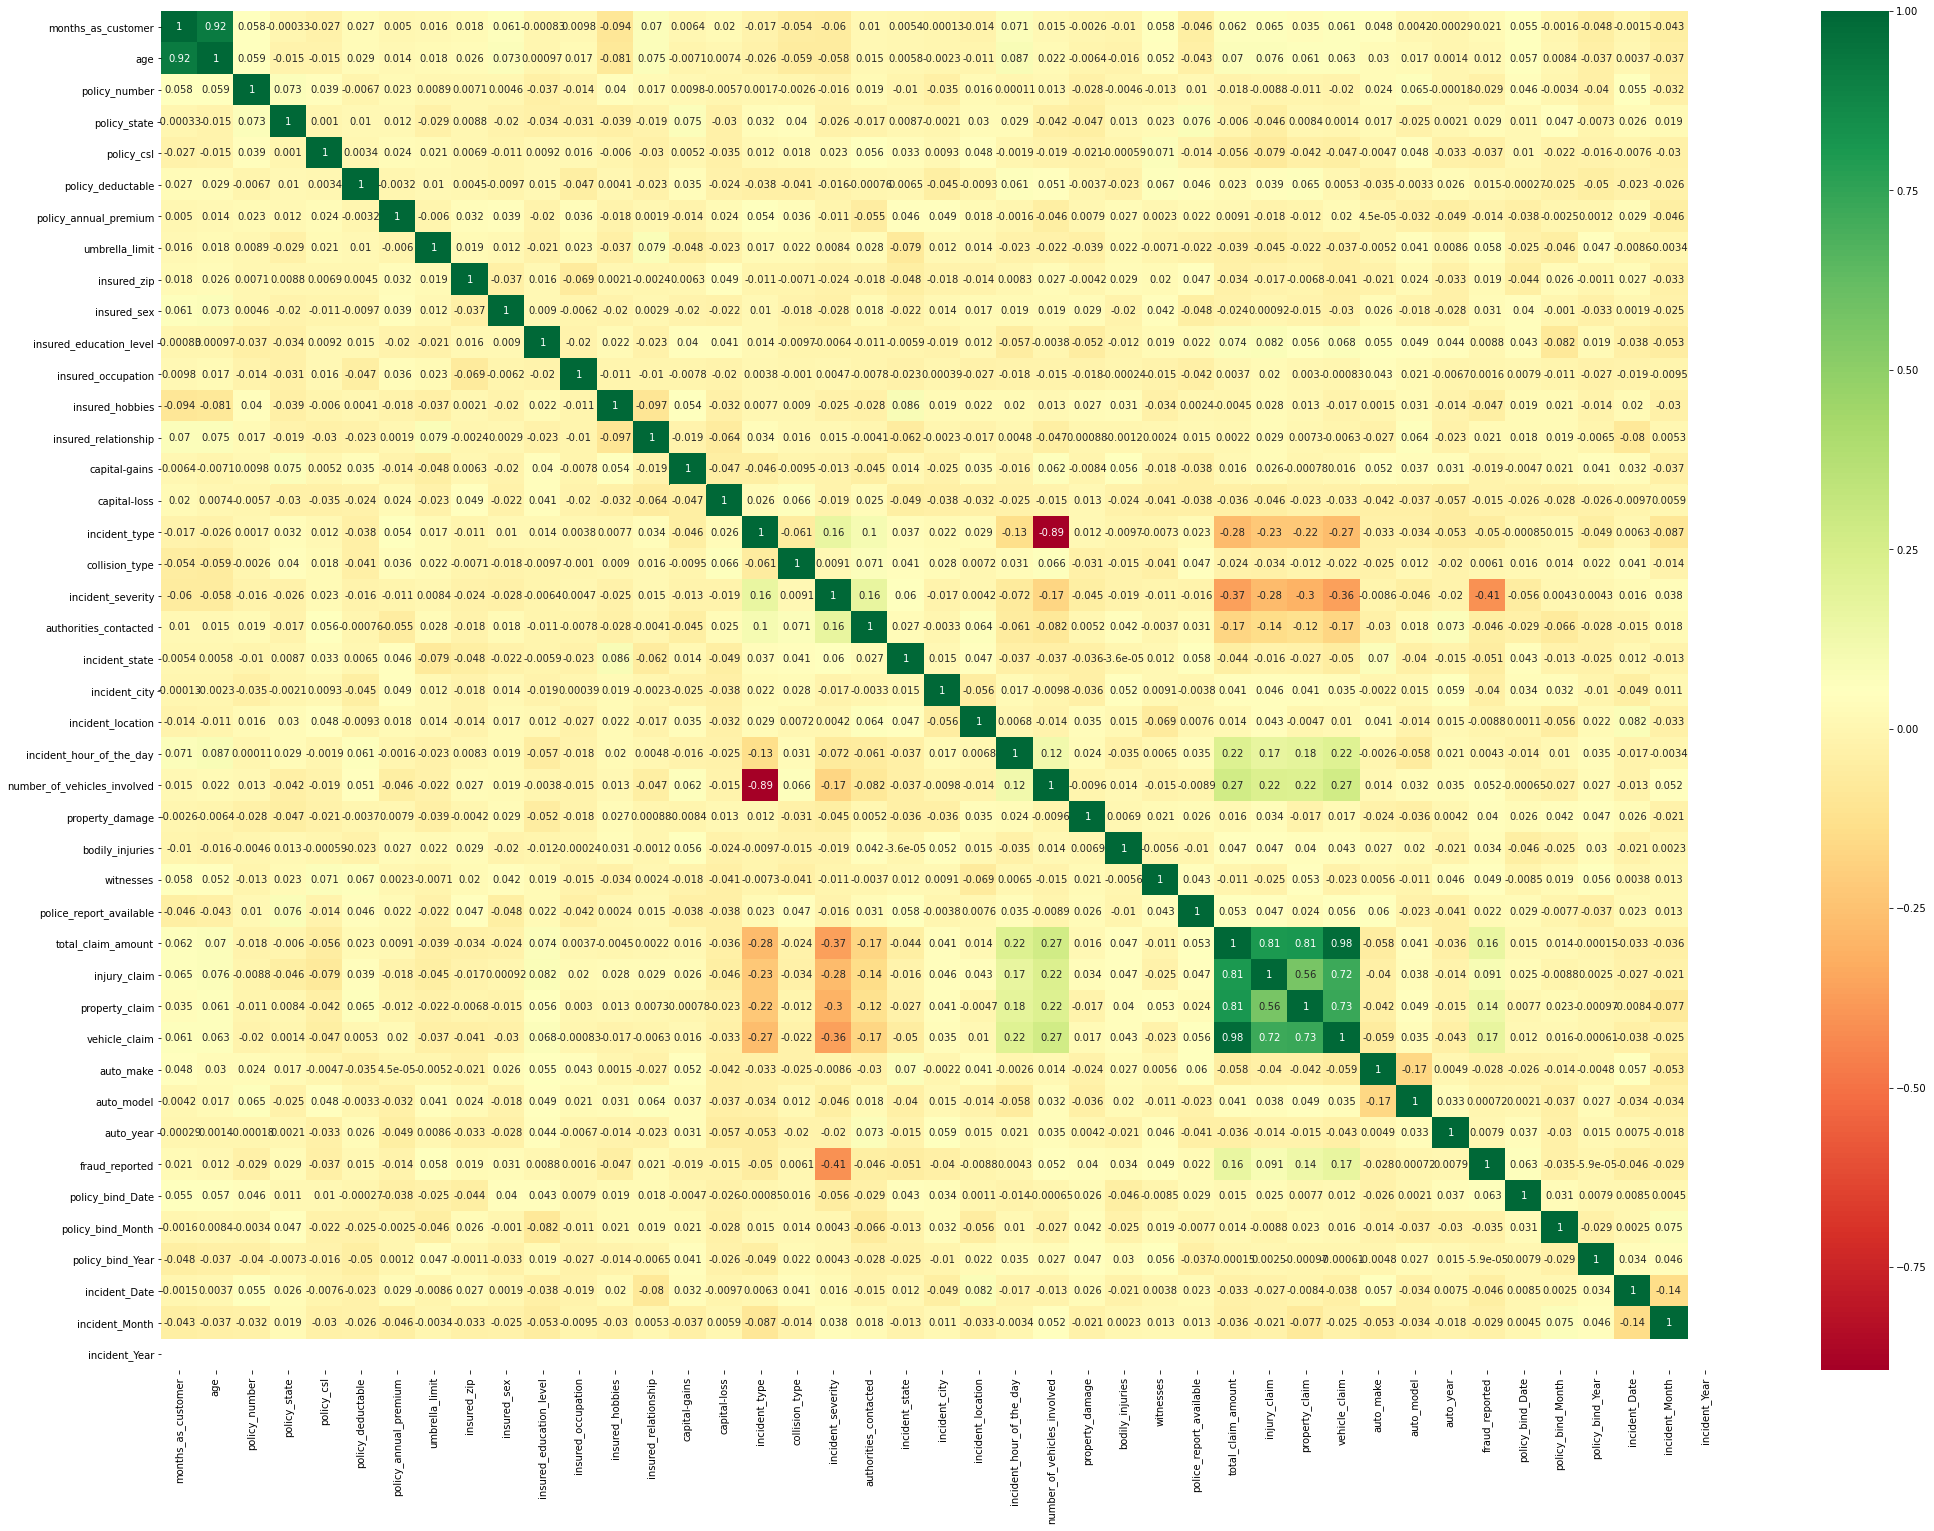

In [42]:
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

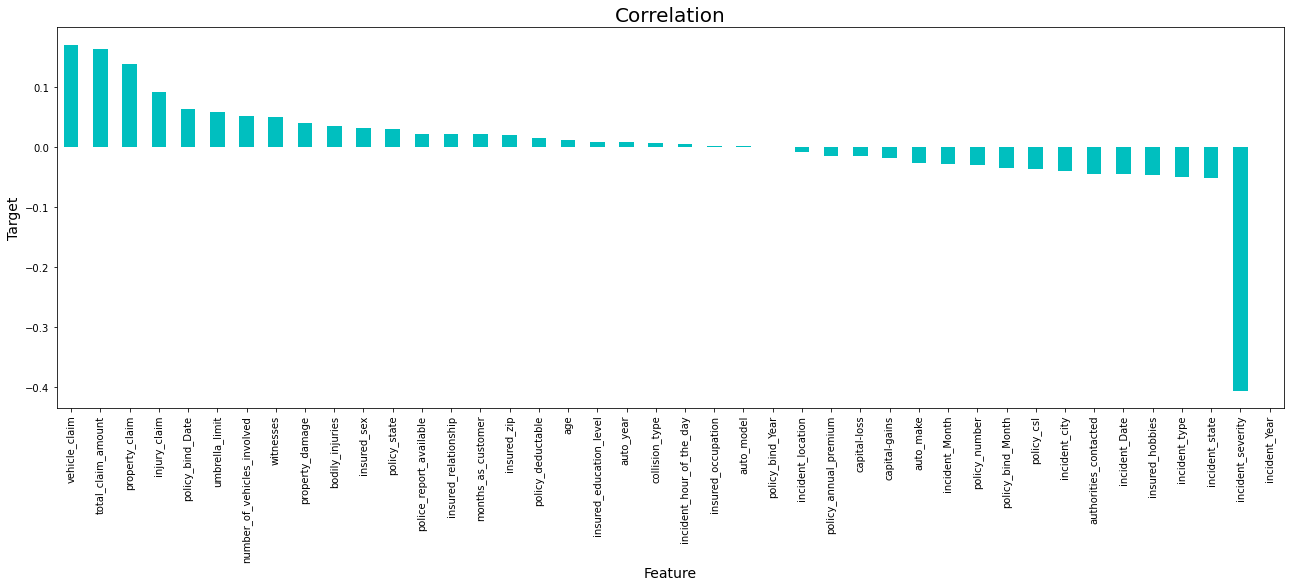

In [43]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

- directly correlated with the vehicle claim, total claim amount, property claim
- inversely correlated with the Incident severty.

#### PreProcessing Pipeline

In [44]:
features=df.drop('fraud_reported',axis=1)
target=df["fraud_reported"]

In [45]:
target.shape

(1000,)

In [46]:
features.shape

(1000, 42)

#### Checking Outliers

months_as_customer
AxesSubplot(0.125,0.125;0.775x0.755)


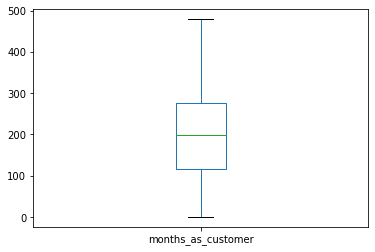

age
AxesSubplot(0.125,0.125;0.775x0.755)


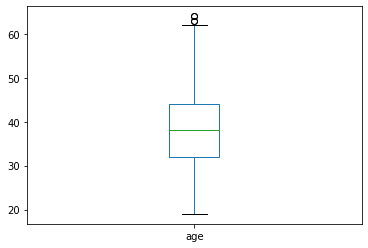

policy_number
AxesSubplot(0.125,0.125;0.775x0.755)


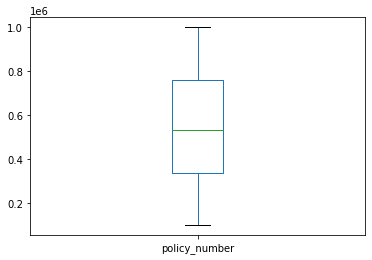

policy_state
AxesSubplot(0.125,0.125;0.775x0.755)


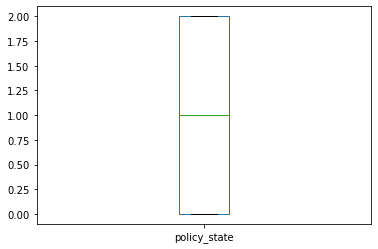

policy_csl
AxesSubplot(0.125,0.125;0.775x0.755)


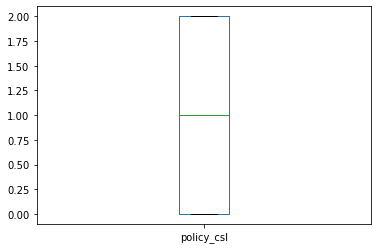

policy_deductable
AxesSubplot(0.125,0.125;0.775x0.755)


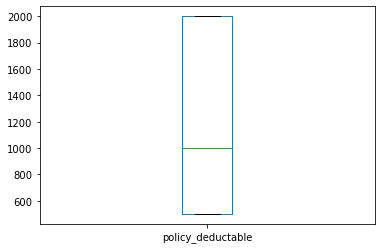

policy_annual_premium
AxesSubplot(0.125,0.125;0.775x0.755)


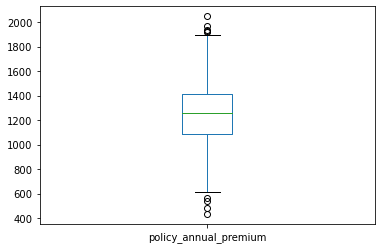

umbrella_limit
AxesSubplot(0.125,0.125;0.775x0.755)


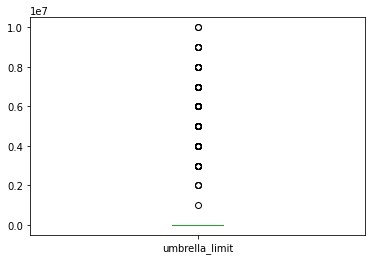

insured_zip
AxesSubplot(0.125,0.125;0.775x0.755)


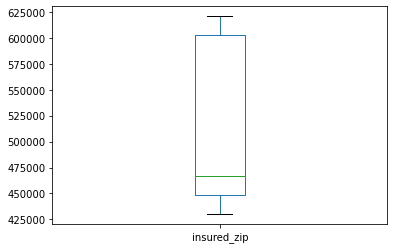

insured_sex
AxesSubplot(0.125,0.125;0.775x0.755)


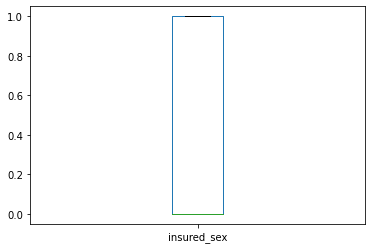

insured_education_level
AxesSubplot(0.125,0.125;0.775x0.755)


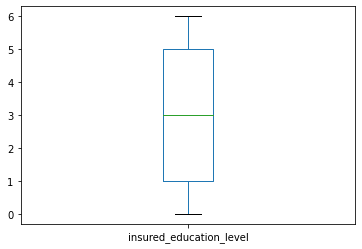

insured_occupation
AxesSubplot(0.125,0.125;0.775x0.755)


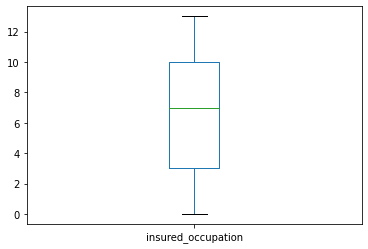

insured_hobbies
AxesSubplot(0.125,0.125;0.775x0.755)


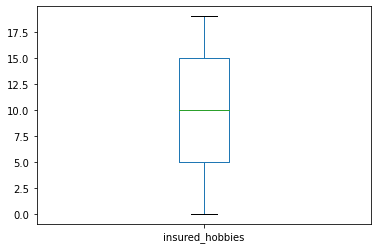

insured_relationship
AxesSubplot(0.125,0.125;0.775x0.755)


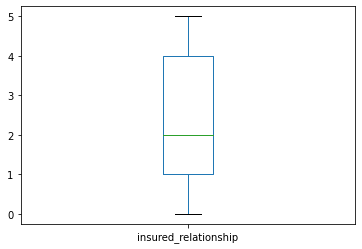

capital-gains
AxesSubplot(0.125,0.125;0.775x0.755)


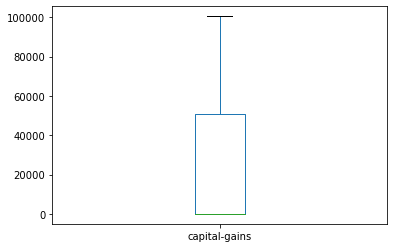

capital-loss
AxesSubplot(0.125,0.125;0.775x0.755)


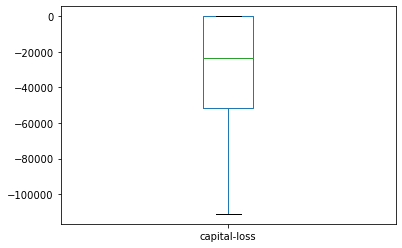

incident_type
AxesSubplot(0.125,0.125;0.775x0.755)


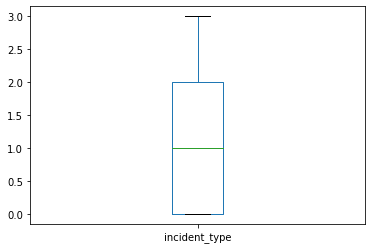

collision_type
AxesSubplot(0.125,0.125;0.775x0.755)


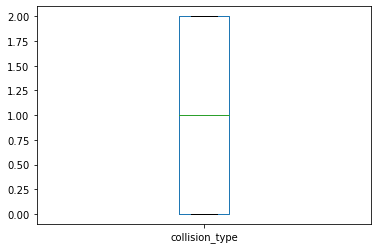

incident_severity
AxesSubplot(0.125,0.125;0.775x0.755)


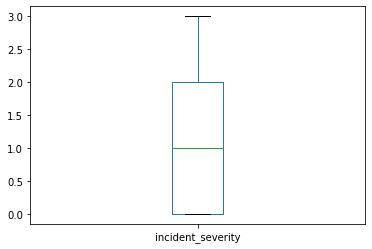

authorities_contacted
AxesSubplot(0.125,0.125;0.775x0.755)


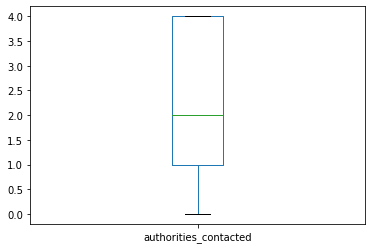

incident_state
AxesSubplot(0.125,0.125;0.775x0.755)


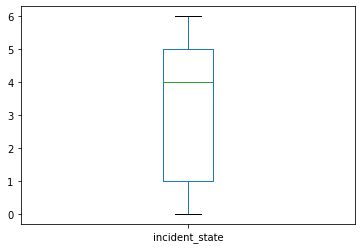

incident_city
AxesSubplot(0.125,0.125;0.775x0.755)


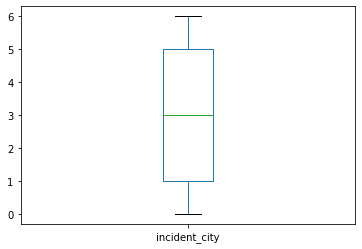

incident_location
AxesSubplot(0.125,0.125;0.775x0.755)


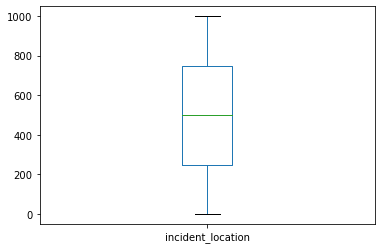

incident_hour_of_the_day
AxesSubplot(0.125,0.125;0.775x0.755)


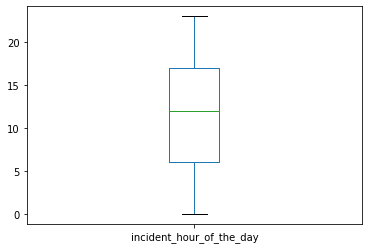

number_of_vehicles_involved
AxesSubplot(0.125,0.125;0.775x0.755)


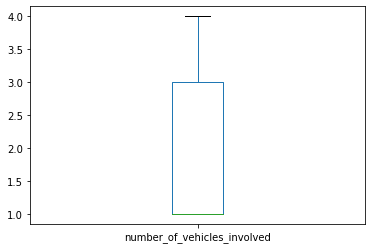

property_damage
AxesSubplot(0.125,0.125;0.775x0.755)


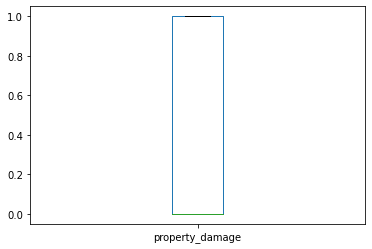

bodily_injuries
AxesSubplot(0.125,0.125;0.775x0.755)


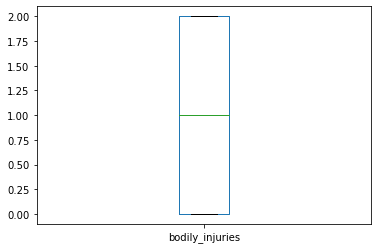

witnesses
AxesSubplot(0.125,0.125;0.775x0.755)


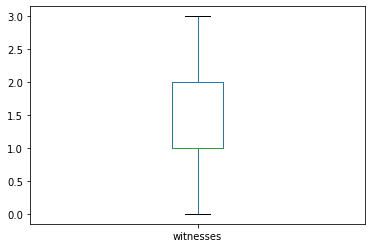

police_report_available
AxesSubplot(0.125,0.125;0.775x0.755)


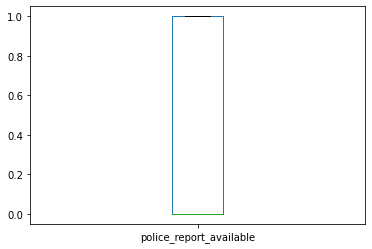

total_claim_amount
AxesSubplot(0.125,0.125;0.775x0.755)


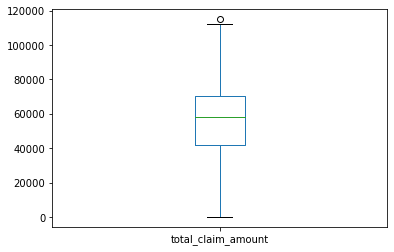

injury_claim
AxesSubplot(0.125,0.125;0.775x0.755)


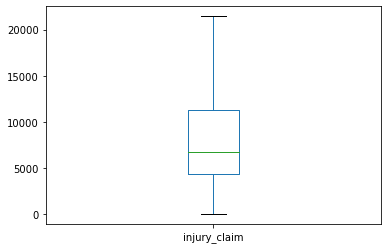

property_claim
AxesSubplot(0.125,0.125;0.775x0.755)


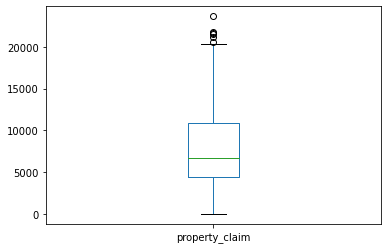

vehicle_claim
AxesSubplot(0.125,0.125;0.775x0.755)


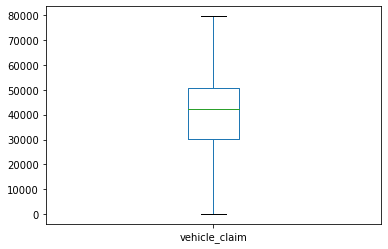

auto_make
AxesSubplot(0.125,0.125;0.775x0.755)


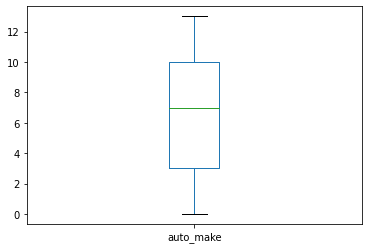

auto_model
AxesSubplot(0.125,0.125;0.775x0.755)


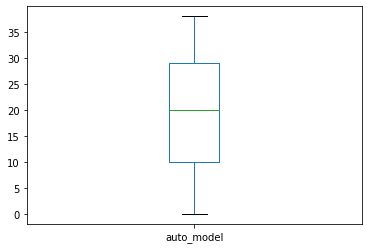

auto_year
AxesSubplot(0.125,0.125;0.775x0.755)


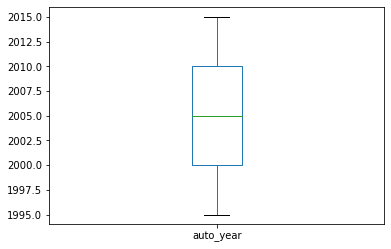

policy_bind_Date
AxesSubplot(0.125,0.125;0.775x0.755)


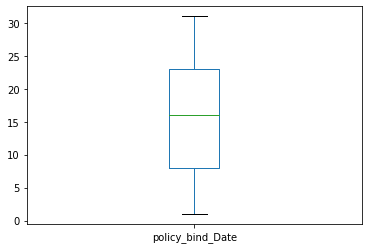

policy_bind_Month
AxesSubplot(0.125,0.125;0.775x0.755)


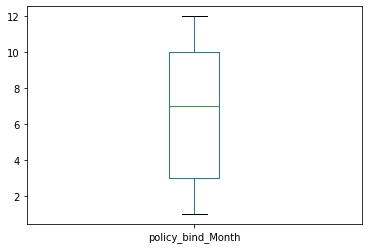

policy_bind_Year
AxesSubplot(0.125,0.125;0.775x0.755)


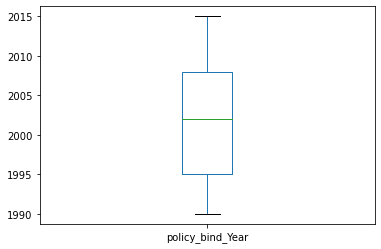

incident_Date
AxesSubplot(0.125,0.125;0.775x0.755)


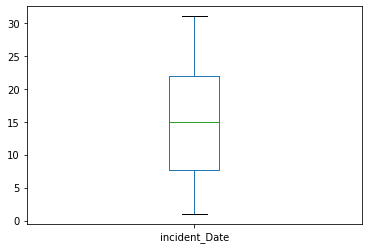

incident_Month
AxesSubplot(0.125,0.125;0.775x0.755)


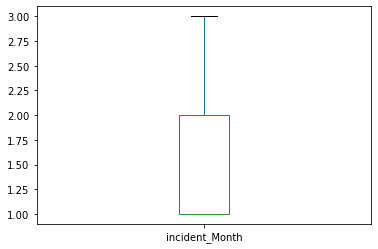

incident_Year
AxesSubplot(0.125,0.125;0.775x0.755)


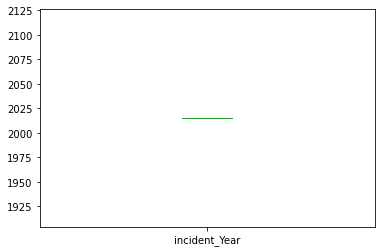

In [47]:
for i in features:
    print(i)
    print(features[i].plot.box())
    plt.show()

There are outliers in following columns...

- Policy Annual Premium
- umbrella Limit
- Property Claim


-----> I won't be treating outliers as it will hamper the quality of our data because...
-Policy Annual Premium ----- There might be few people who might be paying more premium because of the expensive cars.
- umbrella Limit ----- The people have opted for umbrella limit
- Property Claim ----- because of severe damage the claim might be high.

#### Checking Skewness..

In [48]:
from scipy.stats import skew

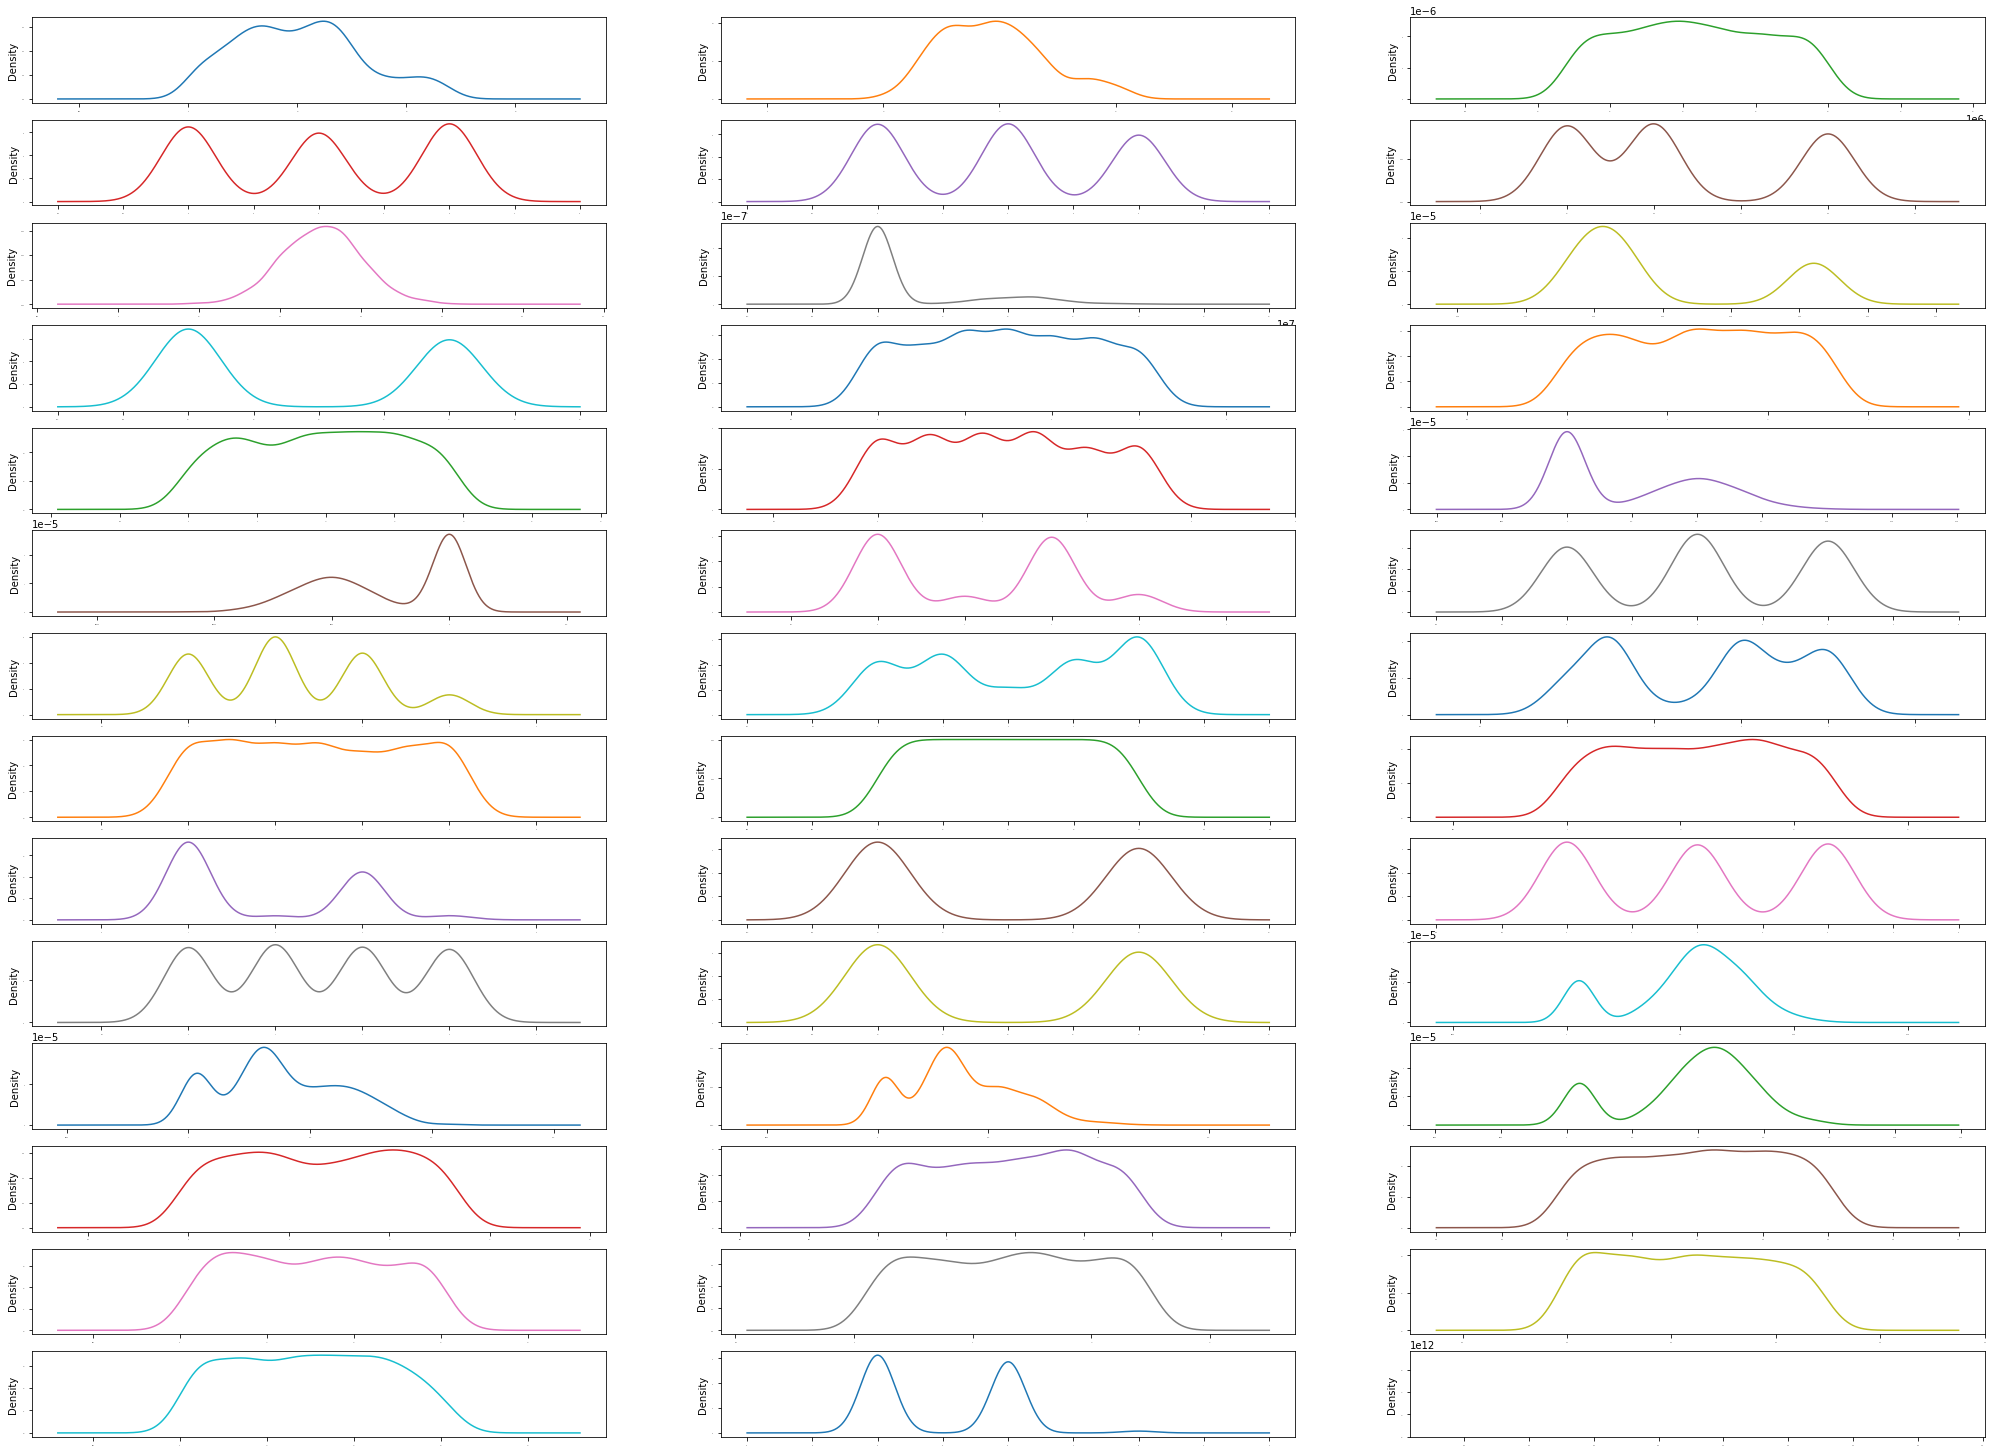

In [49]:
features.plot(kind='density',subplots=True, layout=(15,3), sharex=False, legend=False, fontsize=1,figsize=(35,28))
plt.show()

months_as_customer
AxesSubplot(0.125,0.125;0.775x0.755)


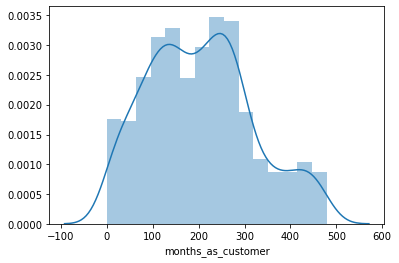

age
AxesSubplot(0.125,0.125;0.775x0.755)


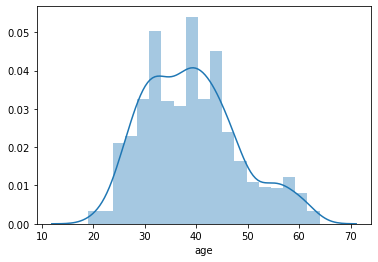

policy_number
AxesSubplot(0.125,0.125;0.775x0.755)


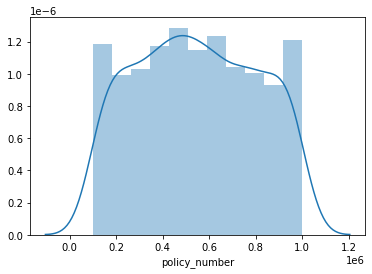

policy_state
AxesSubplot(0.125,0.125;0.775x0.755)


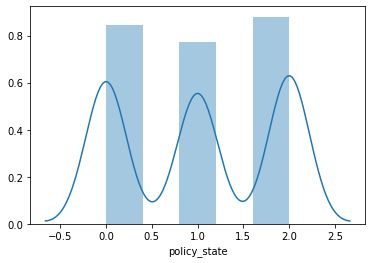

policy_csl
AxesSubplot(0.125,0.125;0.775x0.755)


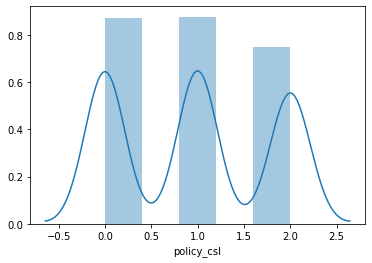

policy_deductable
AxesSubplot(0.125,0.125;0.775x0.755)


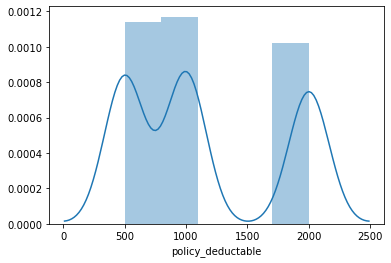

policy_annual_premium
AxesSubplot(0.125,0.125;0.775x0.755)


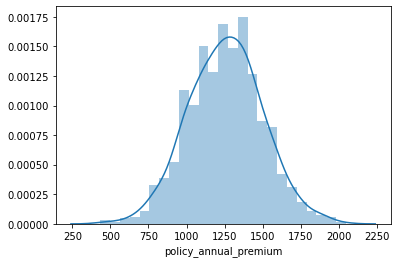

umbrella_limit
AxesSubplot(0.125,0.125;0.775x0.755)


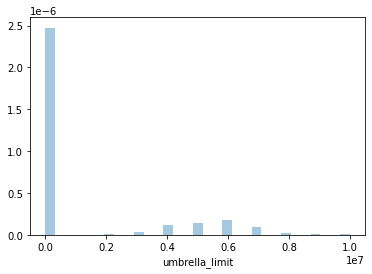

insured_zip
AxesSubplot(0.125,0.125;0.775x0.755)


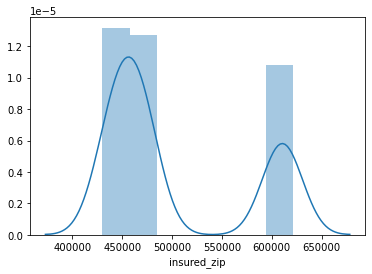

insured_sex
AxesSubplot(0.125,0.125;0.775x0.755)


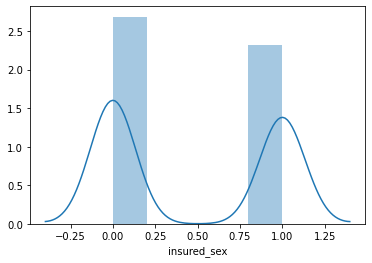

insured_education_level
AxesSubplot(0.125,0.125;0.775x0.755)


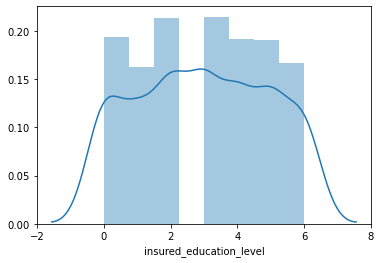

insured_occupation
AxesSubplot(0.125,0.125;0.775x0.755)


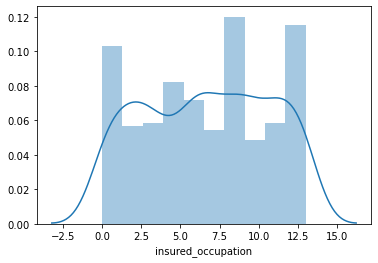

insured_hobbies
AxesSubplot(0.125,0.125;0.775x0.755)


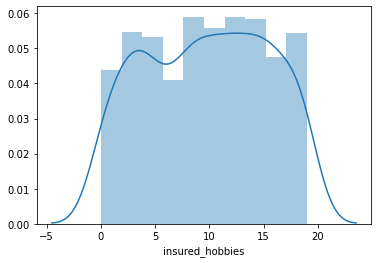

insured_relationship
AxesSubplot(0.125,0.125;0.775x0.755)


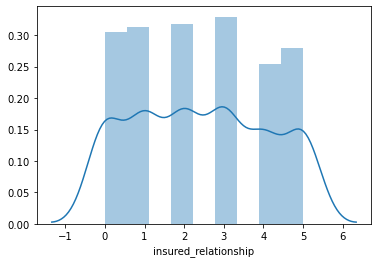

capital-gains
AxesSubplot(0.125,0.125;0.775x0.755)


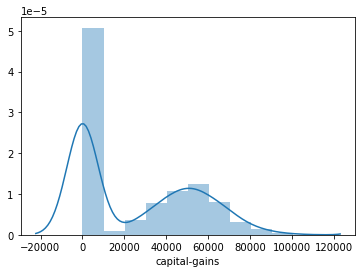

capital-loss
AxesSubplot(0.125,0.125;0.775x0.755)


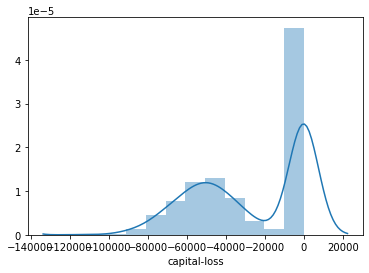

incident_type
AxesSubplot(0.125,0.125;0.775x0.755)


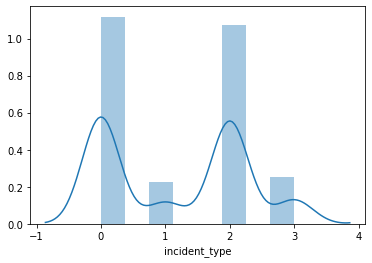

collision_type
AxesSubplot(0.125,0.125;0.775x0.755)


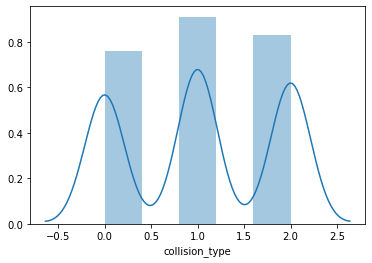

incident_severity
AxesSubplot(0.125,0.125;0.775x0.755)


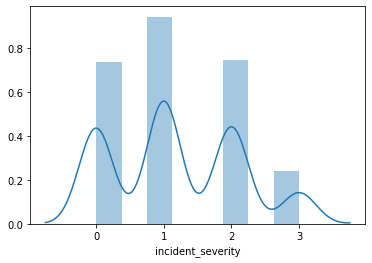

authorities_contacted
AxesSubplot(0.125,0.125;0.775x0.755)


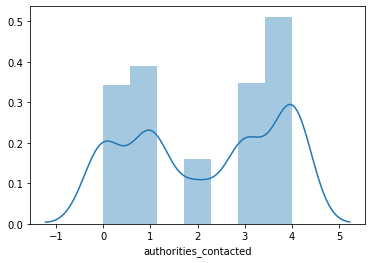

incident_state
AxesSubplot(0.125,0.125;0.775x0.755)


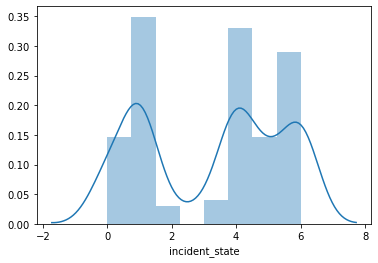

incident_city
AxesSubplot(0.125,0.125;0.775x0.755)


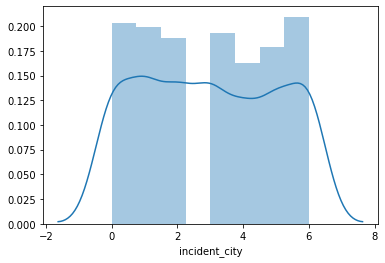

incident_location
AxesSubplot(0.125,0.125;0.775x0.755)


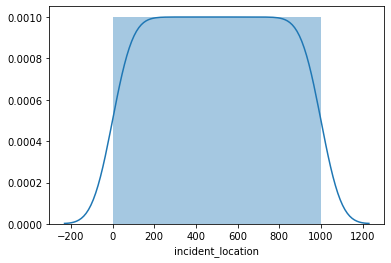

incident_hour_of_the_day
AxesSubplot(0.125,0.125;0.775x0.755)


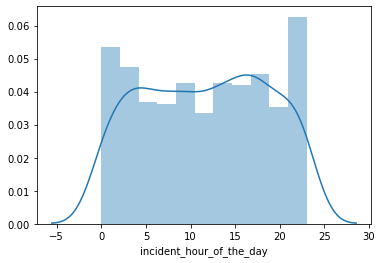

number_of_vehicles_involved
AxesSubplot(0.125,0.125;0.775x0.755)


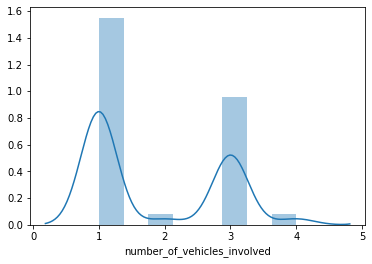

property_damage
AxesSubplot(0.125,0.125;0.775x0.755)


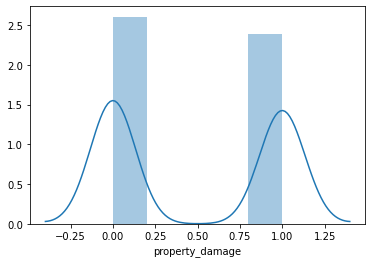

bodily_injuries
AxesSubplot(0.125,0.125;0.775x0.755)


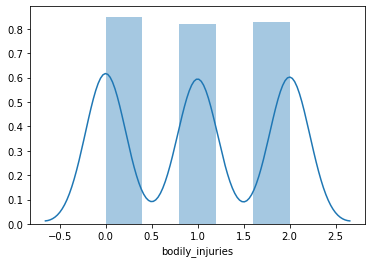

witnesses
AxesSubplot(0.125,0.125;0.775x0.755)


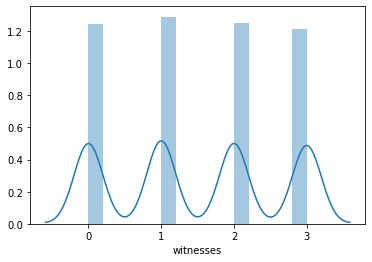

police_report_available
AxesSubplot(0.125,0.125;0.775x0.755)


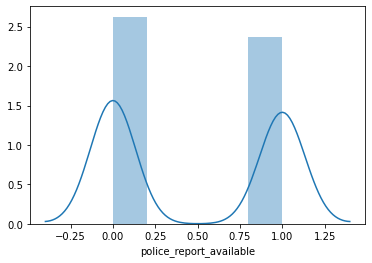

total_claim_amount
AxesSubplot(0.125,0.125;0.775x0.755)


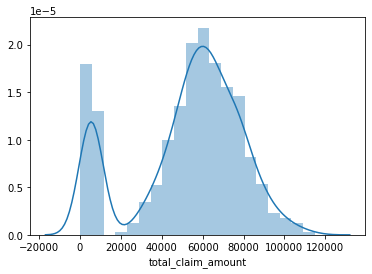

injury_claim
AxesSubplot(0.125,0.125;0.775x0.755)


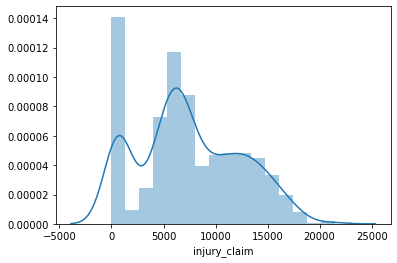

property_claim
AxesSubplot(0.125,0.125;0.775x0.755)


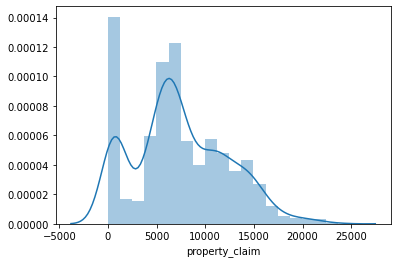

vehicle_claim
AxesSubplot(0.125,0.125;0.775x0.755)


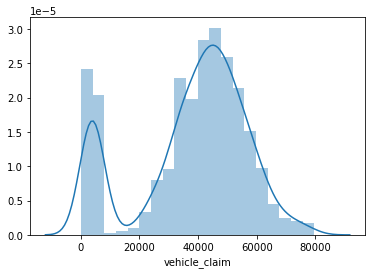

auto_make
AxesSubplot(0.125,0.125;0.775x0.755)


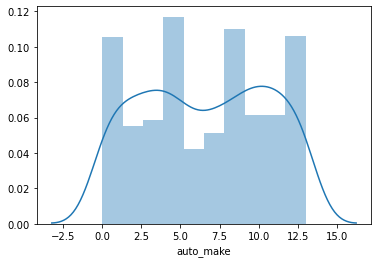

auto_model
AxesSubplot(0.125,0.125;0.775x0.755)


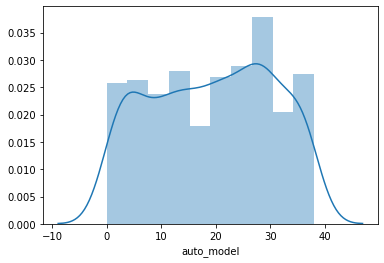

auto_year
AxesSubplot(0.125,0.125;0.775x0.755)


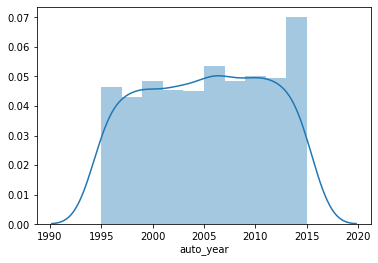

policy_bind_Date
AxesSubplot(0.125,0.125;0.775x0.755)


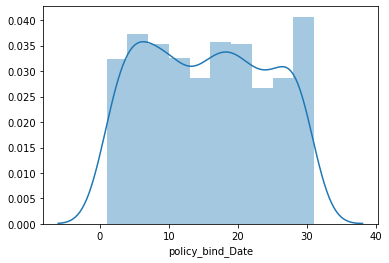

policy_bind_Month
AxesSubplot(0.125,0.125;0.775x0.755)


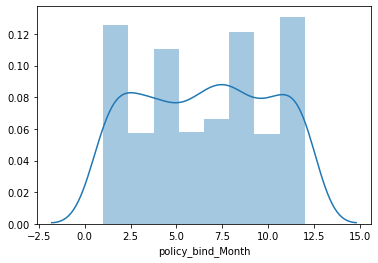

policy_bind_Year
AxesSubplot(0.125,0.125;0.775x0.755)


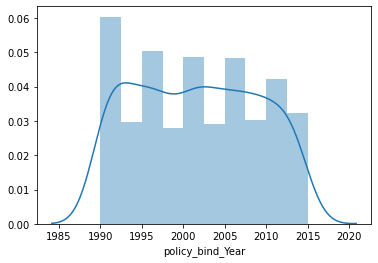

incident_Date
AxesSubplot(0.125,0.125;0.775x0.755)


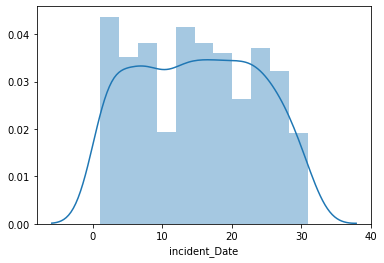

incident_Month
AxesSubplot(0.125,0.125;0.775x0.755)


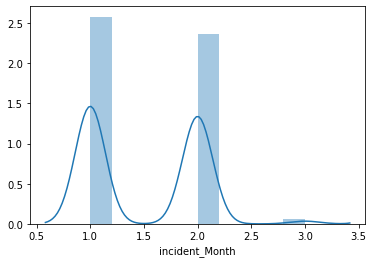

incident_Year
AxesSubplot(0.125,0.125;0.775x0.755)


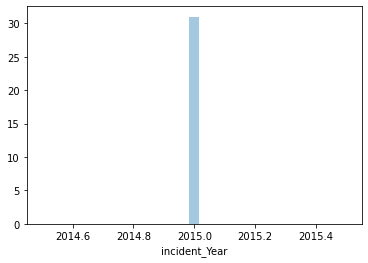

In [50]:
for i in features:
    print (i)
    print(sns.distplot(features[i]))
    plt.show()

In [51]:
features.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.807130
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.050207
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


keeping the threshold value (+-.5)

Umbera limit- 
vehicle claim- 
Insured zip - 

#### Scaling

In [52]:
#using min max scaler...

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()


In [53]:
scaler=MinMaxScaler()
scaler.fit_transform(features)

array([[0.68475992, 0.64444444, 0.4682467 , ..., 0.8       , 0.        ,
        0.        ],
       [0.47599165, 0.51111111, 0.26936974, ..., 0.66666667, 0.        ,
        0.        ],
       [0.27974948, 0.22222222, 0.65309788, ..., 0.7       , 0.5       ,
        0.        ],
       ...,
       [0.27139875, 0.33333333, 0.90995303, ..., 0.73333333, 0.        ,
        0.        ],
       [0.95615866, 0.95555556, 0.48199539, ..., 0.83333333, 0.5       ,
        0.        ],
       [0.9519833 , 0.91111111, 0.50663287, ..., 0.83333333, 0.5       ,
        0.        ]])

In [54]:
#Algorithms:-
   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [56]:
#using logistic regression

# taking test size as 30%


maxAccu=0
maxRS= 0
for i in range (1,200):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.20,random_state=i)
    lr.fit(features_train,target_train)
    predlr=lr.predict(features_test)
    acc=accuracy_score(target_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
   
        
print('Best accuracy is',maxAccu,' on Random_state', maxRS)

Best accuracy is 0.835  on Random_state 190


In [57]:
### Creating train-test split

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.20,random_state=190)

### Logistic regression

In [58]:
lr.fit(features_train,target_train)
lr.score(features_train,target_train)
predlr=lr.predict(features_test)

print(accuracy_score(target_test,predlr))
print(confusion_matrix(target_test,predlr))
print(classification_report(target_test,predlr))

0.835
[[164   2]
 [ 31   3]]
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       166
         1.0       0.60      0.09      0.15        34

    accuracy                           0.83       200
   macro avg       0.72      0.54      0.53       200
weighted avg       0.80      0.83      0.78       200



### GaussianNB

In [59]:
gnb.fit(features_train,target_train)
predgnb=gnb.predict(features_test)
print(accuracy_score(target_test,predgnb))

print(confusion_matrix(target_test,predgnb))

print(classification_report(target_test,predgnb))

0.63
[[110  56]
 [ 18  16]]
              precision    recall  f1-score   support

         0.0       0.86      0.66      0.75       166
         1.0       0.22      0.47      0.30        34

    accuracy                           0.63       200
   macro avg       0.54      0.57      0.53       200
weighted avg       0.75      0.63      0.67       200



### SupportVectorClassifier

In [60]:
svc.fit(features_train,target_train)
svc.score(features_train,target_train)
predsvc=svc.predict(features_test)

print(accuracy_score(target_test,predsvc))
print(confusion_matrix(target_test,predsvc))
print(classification_report(target_test,predsvc))

0.83
[[166   0]
 [ 34   0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       166
         1.0       0.00      0.00      0.00        34

    accuracy                           0.83       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.69      0.83      0.75       200



### DecissionTreeClassifier

In [61]:
dtc.fit(features_train,target_train)
dtc.score(features_train,target_train)
preddtc=dtc.predict(features_test)

print(accuracy_score(target_test,preddtc))
print(confusion_matrix(target_test,preddtc))
print(classification_report(target_test,preddtc))

0.815
[[140  26]
 [ 11  23]]
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       166
         1.0       0.47      0.68      0.55        34

    accuracy                           0.81       200
   macro avg       0.70      0.76      0.72       200
weighted avg       0.85      0.81      0.83       200



### KNeighboursClassifier()

In [62]:
knn.fit(features_train,target_train)
knn.score(features_train,target_train)
predknn=knn.predict(features_test)

print(accuracy_score(target_test,predknn))
print(confusion_matrix(target_test,predknn))
print(classification_report(target_test,predknn))

0.735
[[140  26]
 [ 27   7]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       166
         1.0       0.21      0.21      0.21        34

    accuracy                           0.73       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.73      0.73      0.73       200



### RandomForestClassifier

In [63]:
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
predrf=rf.predict(features_test)

print(accuracy_score(target_test,predrf))
print(confusion_matrix(target_test,predrf))
print(classification_report(target_test,predrf))

0.77
[[148  18]
 [ 28   6]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       166
         1.0       0.25      0.18      0.21        34

    accuracy                           0.77       200
   macro avg       0.55      0.53      0.54       200
weighted avg       0.74      0.77      0.75       200



### Cross-Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
lrscore=cross_val_score(lr,features,target,cv=7)
print('lrscore is...', lrscore)
print('lrscore.mean',lrscore.mean(),'lrscore.std',lrscore.std())

print('..................')

gnbscore=cross_val_score(gnb,features,target,cv=7)
print('gnbscore is...',gnbscore)
print('gnbscore.mean',gnbscore.mean(),'gnbscore.std',gnbscore.std())

print('..................')

rfscore=cross_val_score(rf,features,target,cv=7)
print('rfscore is...', rfscore)
print('rfscore.mean',rfscore.mean(),'rfscore.std',rfscore.std())

print('..................')

svcscore=cross_val_score(svc,features,target,cv=7)
print('svcscore is...',svcscore)
print('svcscore.mean',svcscore.mean(),'svcscore.std',svcscore.std())

print('..................')

dtcscore=cross_val_score(dtc,features,target,cv=7)
print('dtcscore is...',dtcscore)
print('dtcscore.mean',dtcscore.mean(),'dtcscore.std',dtcscore.std())

print('..................')

knnscore=cross_val_score(knn,features,target,cv=7)
print('knnscore is...',knnscore)
print('knnscore.mean=',knnscore.mean(),'knnscore.std',knnscore.std())

lrscore is... [0.74825175 0.75524476 0.76223776 0.74125874 0.75524476 0.75524476
 0.75352113]
lrscore.mean 0.7530005206061542 lrscore.std 0.006107695990485095
..................
gnbscore is... [0.6993007  0.68531469 0.59440559 0.54545455 0.69230769 0.73426573
 0.67605634]
gnbscore.mean 0.6610150412967314 gnbscore.std 0.061433408265404665
..................
rfscore is... [0.76923077 0.76223776 0.78321678 0.74825175 0.76923077 0.79020979
 0.78169014]
rfscore.mean 0.7720096804603847 rfscore.std 0.01323377110796629
..................
svcscore is... [0.74825175 0.74825175 0.75524476 0.75524476 0.75524476 0.75524476
 0.75352113]
svcscore.mean 0.7530005206061542 svcscore.std 0.0030593898777449063
..................
dtcscore is... [0.7972028  0.81118881 0.76223776 0.8041958  0.7972028  0.81118881
 0.79577465]
dtcscore.mean 0.7969987758720152 dtcscore.std 0.015419937135723762
..................
knnscore is... [0.70629371 0.68531469 0.72027972 0.73426573 0.64335664 0.69230769
 0.71830986]
knnsco

The minimum diffrence in accuracy and cross validation score is for RandomForestClassifier(),
- so this is our best fit model

### Hyper parameter tunning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameters = {'max_depth':np.arange(2,15),
             'criterion':['gini','entropy']}

In [68]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [69]:
GCV.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [70]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [71]:
GCV_pred=GCV.best_estimator_.predict(features_test)

In [72]:
accuracy_score(target_test,GCV_pred)

0.795

In [73]:
#the score increased with 1%